In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import random

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Tanaya\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load dataset
data = pd.read_csv("Pune_Booking_Data.csv")

In [23]:
data.head(10)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for Cancelling by Customer,Cancelled Rides by Driver,Reason for Cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-01-08,03:00:35,CNR1445274447,Driver not found,CUST42839,Prime SUV,Bavdhan,Kharadi,0.0,0.0,...,Not Applicable,0,Not Applicable,1,Vehicle Breakdown,0.0,0.0,0.0,0.0,Card
1,2024-01-18,13:36:09,CNR1466259160,Driver not found,CUST67678,Prime Sedan,Bibvewadi,Kondhwa,0.0,0.0,...,Not Applicable,0,Not Applicable,1,Other Issue,0.0,0.0,0.0,0.0,Cash
2,2024-01-01,02:19:19,CNR9647456421,Complete,CUST70454,Bike,Manjri,Nigdi,8.0,9.0,...,Not Applicable,0,Not Applicable,0,Not Applicable,122.0,12.8,5.0,3.0,UPI
3,2024-01-25,08:38:31,CNR7745494098,Complete,CUST19037,Mini,Shivajinagar,Manjri,8.0,6.0,...,Not Applicable,0,Not Applicable,0,Not Applicable,158.0,5.8,1.0,3.0,Cash
4,2024-01-12,13:36:48,CNR8947342497,Driver not found,CUST64357,eBike,Wanowrie,Lavale,0.0,0.0,...,Not Applicable,0,Not Applicable,1,Other Issue,0.0,0.0,0.0,0.0,UPI
5,2024-01-12,15:33:26,CNR7620587995,Complete,CUST63385,Mini,Balewadi,Manjri,3.0,7.0,...,Not Applicable,0,Not Applicable,0,Not Applicable,179.0,9.2,4.0,4.0,Card
6,2024-01-19,02:13:07,CNR8512552651,Complete,CUST48542,Auto,Camp,Vadgaon Sheri,10.0,5.0,...,Not Applicable,0,Not Applicable,0,Not Applicable,207.0,7.1,3.0,2.0,Cash
7,2024-01-26,21:16:59,CNR1614303551,Complete,CUST49410,Prime Plus,Mundhwa,Bavdhan,9.0,13.0,...,Not Applicable,0,Not Applicable,0,Not Applicable,828.0,17.9,3.0,4.0,Cash
8,2024-01-11,04:17:07,CNR4197109360,Cancelled by customer,CUST96968,Prime Sedan,Dhole Patil Road,Sinhagad Road,0.0,0.0,...,Change of plans,0,Not Applicable,0,Not Applicable,0.0,0.0,0.0,0.0,Cash
9,2024-01-29,20:02:07,CNR7763974476,Complete,CUST59707,Prime Plus,Karve Nagar,Narhe,7.0,10.0,...,Not Applicable,0,Not Applicable,0,Not Applicable,851.0,19.8,5.0,4.0,UPI


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               100000 non-null  object 
 1   Time                               100000 non-null  object 
 2   Booking ID                         100000 non-null  object 
 3   Booking Status                     100000 non-null  object 
 4   Customer ID                        100000 non-null  object 
 5   Vehicle Type                       100000 non-null  object 
 6   Pickup Location                    100000 non-null  object 
 7   Drop Location                      100000 non-null  object 
 8   Avg VTAT                           62115 non-null   float64
 9   Avg CTAT                           62115 non-null   float64
 10  Cancelled Rides by Customer        100000 non-null  int64  
 11  Reason for Cancelling by Customer  7054 

In [5]:
# Identify missing values
data.isnull().sum()

Date                                     0
Time                                     0
Booking ID                               0
Booking Status                           0
Customer ID                              0
Vehicle Type                             0
Pickup Location                          0
Drop Location                            0
Avg VTAT                             37885
Avg CTAT                             37885
Cancelled Rides by Customer              0
Reason for Cancelling by Customer    92946
Cancelled Rides by Driver                0
Reason for Cancelling by Driver      82009
Incomplete Rides                         0
Incomplete Rides Reason              87160
Booking Value                        37885
Ride Distance                        37885
Driver Ratings                       37885
Customer Rating                      37885
Payment Method                           0
dtype: int64

In [21]:
# Replace null values in specified columns with appropriate values
data['Avg CTAT'] = data['Avg CTAT'].fillna(0)
data['Avg VTAT'] = data['Avg VTAT'].fillna(0)
data['Reason for Cancelling by Customer'] = data['Reason for Cancelling by Customer'].fillna('Not Applicable')
data['Reason for Cancelling by Driver'] = data['Reason for Cancelling by Driver'].fillna('Not Applicable')
data['Incomplete Rides Reason'] = data['Incomplete Rides Reason'].fillna('Not Applicable')
data['Booking Value'] = data['Booking Value'].fillna(0)
data['Ride Distance'] = data['Ride Distance'].fillna(0)
data['Driver Ratings'] = data['Driver Ratings'].fillna(0)
data['Customer Rating'] = data['Customer Rating'].fillna(0)

# Verify the changes
print(data.isnull().sum())


Date                                 0
Time                                 0
Booking ID                           0
Booking Status                       0
Customer ID                          0
Vehicle Type                         0
Pickup Location                      0
Drop Location                        0
Avg VTAT                             0
Avg CTAT                             0
Cancelled Rides by Customer          0
Reason for Cancelling by Customer    0
Cancelled Rides by Driver            0
Reason for Cancelling by Driver      0
Incomplete Rides                     0
Incomplete Rides Reason              0
Booking Value                        0
Ride Distance                        0
Driver Ratings                       0
Customer Rating                      0
Payment Method                       0
dtype: int64


In [6]:
# Check for duplicates in the 'Booking ID' column
duplicate_booking_ids = data[data['Booking ID'].duplicated()]

# Count the number of duplicates
num_duplicates = duplicate_booking_ids.shape[0]

if num_duplicates > 0:
    print(f"There are {num_duplicates} duplicate Booking IDs.")
    print("Duplicate entries:")
    print(duplicate_booking_ids)
else:
    print("No duplicate Booking IDs found.")


No duplicate Booking IDs found.


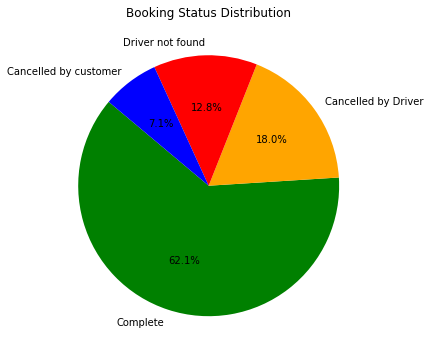

In [7]:
# Booking Status Distribution
booking_status_counts = data['Booking Status'].value_counts()
plt.figure(figsize=(8, 6))
booking_status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'orange', 'red', 'blue'])
plt.title('Booking Status Distribution')
plt.ylabel('')  
plt.show()


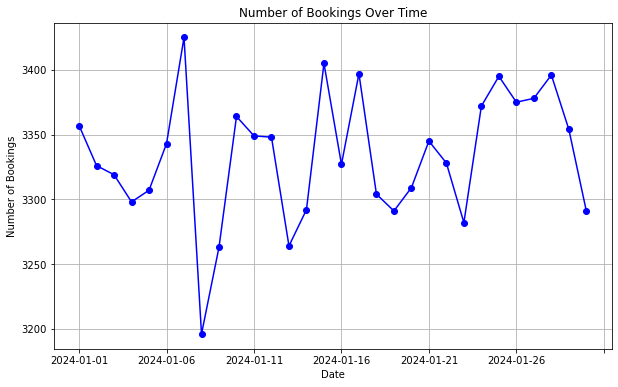

In [8]:
# Convert Date to datetime and aggregate
daily_bookings = data.groupby('Date').size()

plt.figure(figsize=(10, 6))
daily_bookings.plot(kind='line', marker='o', color='blue')
plt.title('Number of Bookings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()


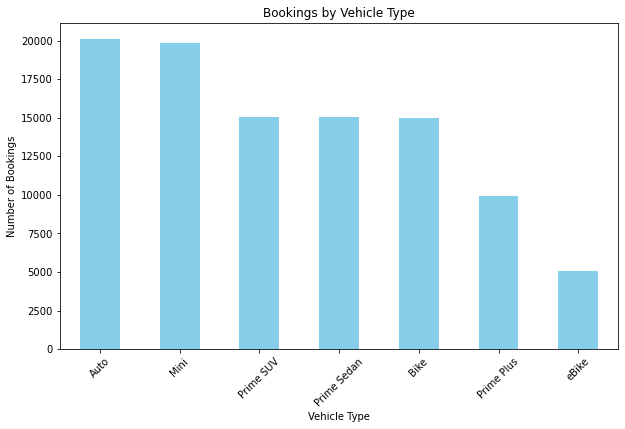

In [9]:
# Vehicle Type Distribution
vehicle_type_counts = data['Vehicle Type'].value_counts()

plt.figure(figsize=(10, 6))
vehicle_type_counts.plot(kind='bar', color='skyblue')
plt.title('Bookings by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()


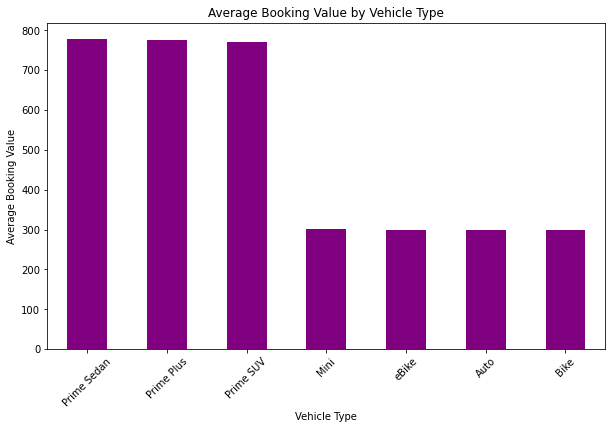

In [10]:
# Average Booking Value by Vehicle Type
avg_booking_value = data.groupby('Vehicle Type')['Booking Value'].mean()

plt.figure(figsize=(10, 6))
avg_booking_value.sort_values(ascending=False).plot(kind='bar', color='purple')
plt.title('Average Booking Value by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Booking Value')
plt.xticks(rotation=45)
plt.show()


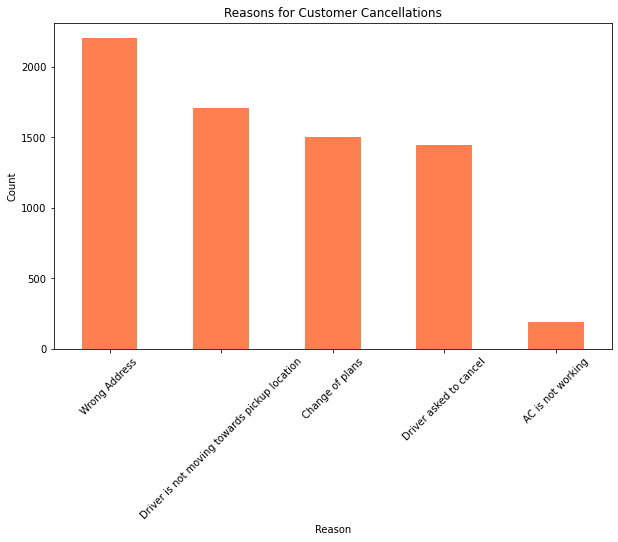

In [13]:
# Exclude "Not Applicable" entries from the customer cancellation reasons
customer_cancel_reasons = data[data['Reason for Cancelling by Customer'] != "Not Applicable"]['Reason for Cancelling by Customer'].value_counts()

# Plot the bar chart for customer cancellation reasons
plt.figure(figsize=(10, 6))
customer_cancel_reasons.plot(kind='bar', color='coral')
plt.title('Reasons for Customer Cancellations')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


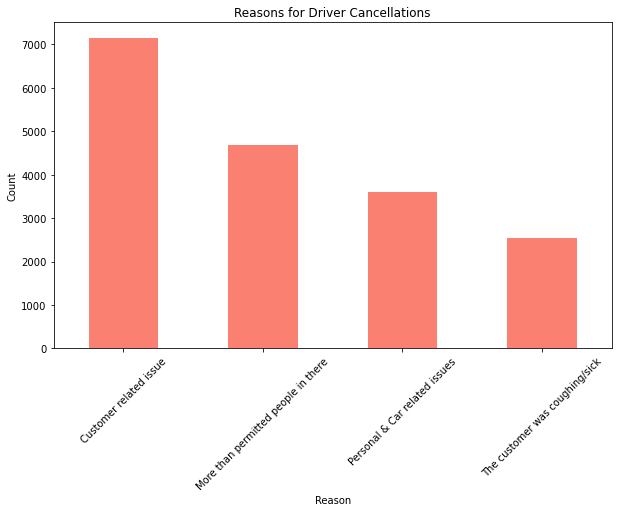

In [14]:
# Exclude "Not Applicable" entries from the driver cancellation reasons
driver_cancel_reasons = data[data['Reason for Cancelling by Driver'] != "Not Applicable"]['Reason for Cancelling by Driver'].value_counts()

# Plot the bar chart for driver cancellation reasons
plt.figure(figsize=(10, 6))
driver_cancel_reasons.plot(kind='bar', color='salmon')
plt.title('Reasons for Driver Cancellations')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


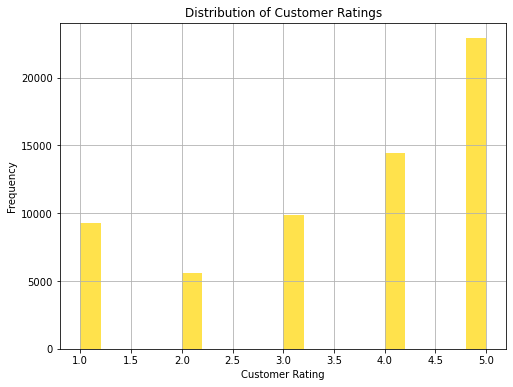

In [16]:
# Customer Ratings Distribution
plt.figure(figsize=(8, 6))
data['Customer Rating'].plot(kind='hist', bins=20, color='gold', alpha=0.7)
plt.title('Distribution of Customer Ratings')
plt.xlabel('Customer Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


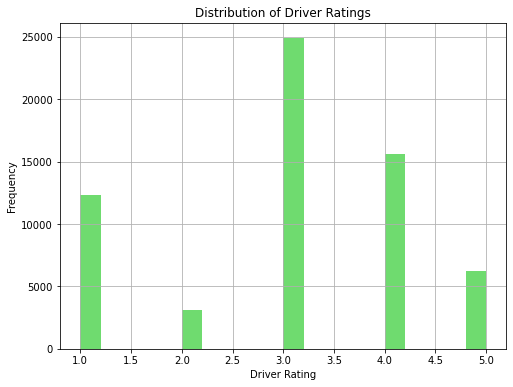

In [17]:
# Driver Ratings Distribution
plt.figure(figsize=(8, 6))
data['Driver Ratings'].plot(kind='hist', bins=20, color='limegreen', alpha=0.7)
plt.title('Distribution of Driver Ratings')
plt.xlabel('Driver Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [18]:
# Count unique customer ratings
customer_ratings_count = data['Customer Rating'].value_counts()
print("Count of unique Customer Ratings:\n", customer_ratings_count)


Count of unique Customer Ratings:
 5.0    22915
4.0    14409
3.0     9887
1.0     9310
2.0     5594
Name: Customer Rating, dtype: int64


In [19]:
# Count unique driver ratings
driver_ratings_count = data['Driver Ratings'].value_counts()
print("Count of unique Driver Ratings:\n", driver_ratings_count)


Count of unique Driver Ratings:
 3.0    24879
4.0    15628
1.0    12312
5.0     6212
2.0     3084
Name: Driver Ratings, dtype: int64


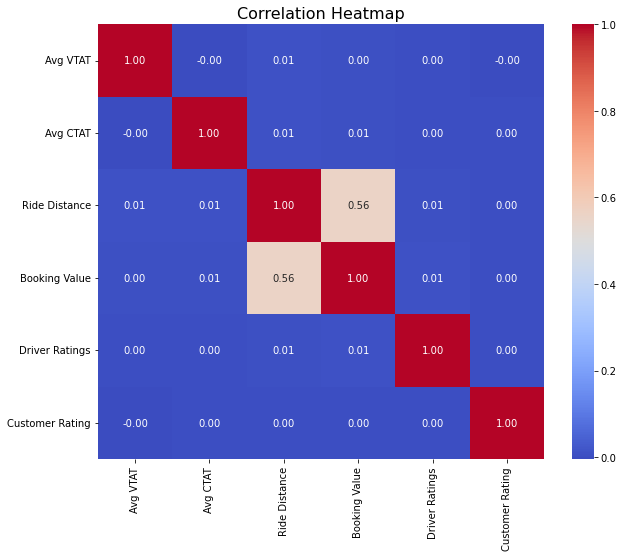

In [20]:
# Select numerical columns
numerical_cols = ['Avg VTAT', 'Avg CTAT', 'Ride Distance', 'Booking Value', 'Driver Ratings', 'Customer Rating']

# Calculate correlation
correlation = data[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [22]:
# Save the cleaned dataset with a more descriptive file name
cleaned_file_path = "Rapido_Pune_Cleaned_Data.csv"
data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")

Cleaned dataset saved to Rapido_Pune_Cleaned_Data.csv
